# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.add("Plots")
Pkg.add("GraphRecipes")
Pkg.add("LaTeXStrings")
Pkg.instantiate()

  Activating new project at `/home2/ajv85/hw1-avandenhende`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed Libmount_jll ───────────────── v2.40.1+0
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed GR_jll ─────────────────────── v0.73.7+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed JpegTurbo_jll ──────────────── v3.0.3+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed LoggingExtras ──────────────── v1.0.3
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Contour ────────────────────── v0.6.3
   Installed Unitful ────────────────────── v1.21.0
   Installed ConcurrentUtilities ────────── v2.4.2
   Installed Grisu ──────────────────────── v1.0.2
   Install

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [4]:
# The error in the code is the initial min_value assignment to 0, where all values in a given array to the function could be greater than 0 resulting in an incorrect output

function minimum(array)
    min_value = array[1]
    for i in 2:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [11]:

# The function was calling "student_grades" instead of the input variable "grades" and the show command was not calling the function
# Additionally, the mean() function is a function of a non-initialized package and has been repalced with a sum/length
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = sum(grades)/length(grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [18]:
# Replaced "zero" function with "zeros" and the passadieci check was altered from "> 11" to ">= 11"

function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) >= 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.497


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [19]:
# This function removes duplicates from a list of values of any kind

function mystery_function(values)
    y = []
    for v in values # For every value in the input list, check if that value is in our growing list y and append each value if it has not already been appended before
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


In [20]:
# This function can be replaced by the julia union function

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show union(list_of_values)

union(list_of_values) = [1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

In [25]:
function compute_mean(v)
    s = 0
    for i in 1:length(v)
        s += v[i]
    end
    return s/length(v)
end

random_vect = rand(Float64, 10)
new_vect = broadcast(-, compute_mean(random_vect), random_vect)
@show compute_mean(new_vect)

compute_mean(new_vect) = 1.1102230246251566e-17


1.1102230246251566e-17

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs 1.50 dollars per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

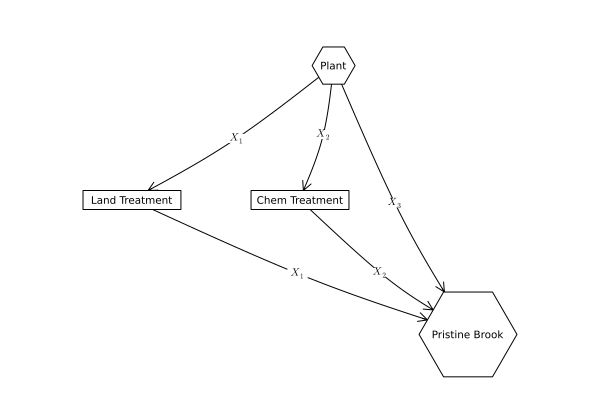

acceptableX1s[mincostindex] = Any[60]
acceptableX2s[mincostindex] = Any[40]
acceptableCosts[mincostindex] = Any[240.0]


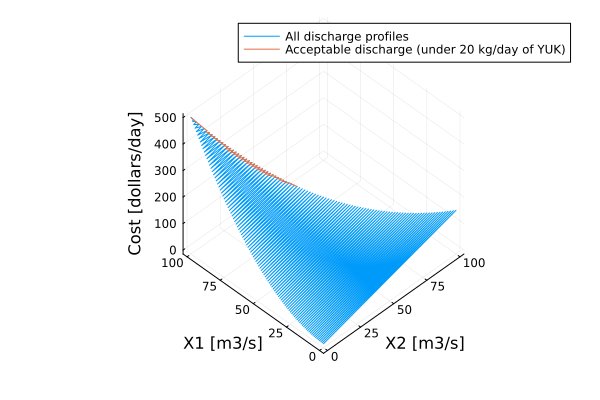

In [79]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"X_3", (2, 4) => L"X_1",(3, 4) => L"X_2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)


# Define general values
QYUKmax = 20 #kg/day

# Produce the total discharge of YUK into Pristine Brook, and the cost of treatment, given some X1, X2, X3 (flows to land treatment, chemical treatment, and directly to Pristine Brook)
function output_YUK(X1, X2)
    Qtotal = 100 #m3/day
    X3 = Qtotal - X1 - X2
    
    Cplant = 1 #kg/m3
    LTremoval = 0.8
    CTremoval = 1 - (0.005*(X2))
    # Total discharge is a sum of discharge from LT, CT, and direct
    discharge = (1-LTremoval)*Cplant*X1 + (1-CTremoval)*Cplant*X2 + Cplant*X3 # kg/day of YUK

    CTcost = 1.5 # dollars per m3
    # Total cost is a sum of costs of LT and CT
    cost = (X1^2/20) + CTcost*X2 # dollars per day

    return (discharge, cost)
end

# Produce a list for X1 and X2 that includes all possible combination of integer values (X1 + X2 <= 100, X1 >= 0, X2 >= 0)
X1s = []
X2s = []
for i in 0:100
    for j in 0:(100-i)
        append!(X1s, i)
        append!(X2s, j)
    end
end

# Produce outputs for YUK discharge into Pristine Brook, and cost, dependent on a specific discharge profile (X1s, X2s)
output = output_YUK.(X1s, X2s)
costs = [out[2] for out in output]
discharges = [out[1] for out in output]

acceptableX1s = []
acceptableX2s = []
acceptableCosts = []

# Produce a list of X1s, X2s, and costs corresponding to acceptable levels of discharge of YUK
for n in 1:length(X1s)
    if discharges[n] <= QYUKmax
        append!(acceptableX1s, X1s[n])
        append!(acceptableX2s, X2s[n])
        append!(acceptableCosts, costs[n])
    end
end

# Find the minimum acceptable discharge cost, and its corresponding index
mincost = minimum(acceptableCosts)
mincostindex = findall(x -> x == mincost, acceptableCosts)

# Show values of the lowest calculated cost of all acceptable discharge profiles
@show acceptableX1s[mincostindex]
@show acceptableX2s[mincostindex]
@show acceptableCosts[mincostindex]

# Plot all discharge profiles and all acceptable discharge profiles calculated on a 3D graph
plot(X1s, X2s, costs, camera = (45, 45), xflip = true, label = "All discharge profiles")
plot!(acceptableX1s, acceptableX2s, acceptableCosts, label = "Acceptable discharge (under 20 kg/day of YUK)")
xlabel!("X1 [m3/s]")
ylabel!("X2 [m3/s]")
zlabel!("Cost [dollars/day]")

As can be seen in the above graph and shown values, the lowest calculated acceptable discharge cost is 240 dollars per day with the following discharge profile:
<br>X1 = 60 m3/s
<br>X2 = 40 m3/s
<br>X3 = 0 m3/s

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.